# **About Titanic Dataset**
The Titanic dataset is a famous dataset that contains information about passengers aboard the Titanic ship, which sank in 1912 after colliding with an iceberg. The dataset is often used in data science and machine learning education and competitions as a starting point for exploring data analysis and predictive modeling techniques.

The Titanic dataset contains information about **1309** passengers, including their age, gender, ticket class, cabin, port of embarkation, and whether they survived or not. The goal of many analyses and models built on the Titanic dataset is to predict whether a given passenger would have survived the disaster.

The variables in the Titanic dataset are as follows:
**PassengerId: Unique identifier for each passenger
Survived: Whether the passenger survived (0 = No, 1 = Yes)
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: Passenger name
Sex: Passenger gender
Age: Passenger age
SibSp: Number of siblings/spouses aboard the Titanic
Parch: Number of parents/children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)**
As mentioned earlier, the main objective of many analyses and models built on the Titanic dataset is to predict whether a given passenger would have survived the disaster, based on their demographic and travel information. This is a **binary classification problem**, where the target variable is **Survived** and the predictors are the other variables in the dataset.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 90587 bytes


# Importing Libraries

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Data Loading

In [ ]:
data=pd.read_csv('/content/titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data shuffling

In [ ]:
data = data.sample(frac=1, random_state=42)


In [ ]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1095,1096,0,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,C.A. 34050,10.5000,NaN,S
1130,1131,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
1294,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
1126,1127,0,3,"Vendel, Mr. Olof Edvin",male,20.0,0,0,350416,7.8542,NaN,S


# Data Dimention:- No. of Rows and Columns

In [ ]:
data.shape

(1309, 12)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1309
Number of Columns 12


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1148 to 1126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


# Get Overall Statistics About The Dataframe

In [ ]:
data.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Data Preprocessing & Data Cleaning

## Data Filtering

In [ ]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data[['Name','Age']]


,Name,Age
1148,"Niklasson, Mr. Samuel",28.0
1049,"Borebank, Mr. John James",42.0
982,"Pedersen, Mr. Olaf",NaN
808,"Meyer, Mr. August",39.0
1195,"McCarthy, Miss. Catherine Katie""""",NaN
...,...,...
1095,"Andrew, Mr. Frank Thomas",25.0
1130,"Douglas, Mrs. Walter Donald (Mahala Dutton)",48.0
1294,"Carrau, Mr. Jose Pedro",17.0
860,"Hansen, Mr. Claus Peter",41.0


In [ ]:
sum(data['Sex']=='male')


843

In [ ]:
data[data['Sex']=='male'].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1148,1149,0,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S
1049,1050,0,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S
982,983,0,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.7750,NaN,S
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C


In [ ]:
sum(data['Survived']==1)


494

## Check Missing (Null) Values In The *Dataset*

In [ ]:
data.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

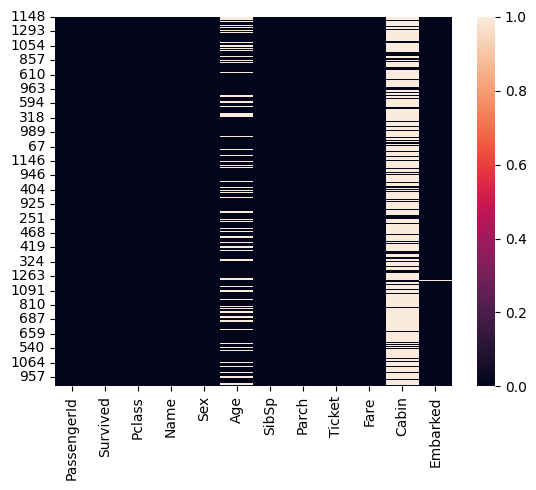

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())


In [ ]:
per_missing = data.isnull().sum() * 100 / len(data)


## Drop the Column

In [ ]:
data.drop('Cabin', axis=1,inplace=True)


In [ ]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

## Handle Missing Values

In [ ]:
data['Embarked'].mode()


0    S
Name: Embarked, dtype: object

In [ ]:
data['Embarked'].fillna('S',inplace=True)


In [ ]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [ ]:
data['Age']


1148    28.0
1049    42.0
982      NaN
808     39.0
1195     NaN
        ... 
1095    25.0
1130    48.0
1294    17.0
860     41.0
1126    20.0
Name: Age, Length: 1309, dtype: float64

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace = True)


In [ ]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)


In [ ]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1148,1149,0,3,"Niklasson, Mr. Samuel",male,28.000000,0,0,363611,8.050,S
1049,1050,0,1,"Borebank, Mr. John James",male,42.000000,0,0,110489,26.550,S
982,983,0,3,"Pedersen, Mr. Olaf",male,29.881138,0,0,345498,7.775,S
808,809,0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.000,S
1195,1196,1,3,"McCarthy, Miss. Catherine Katie""""",female,29.881138,0,0,383123,7.750,Q


In [ ]:
data['Sex'].unique()


array(['male', 'female'], dtype=object)

In [ ]:
data['Gender']=data['Sex'].map({'male':1, 'female':0})


In [ ]:
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
1148,1149,0,3,"Niklasson, Mr. Samuel",male,28.000000,0,0,363611,8.050,S,1
1049,1050,0,1,"Borebank, Mr. John James",male,42.000000,0,0,110489,26.550,S,1
982,983,0,3,"Pedersen, Mr. Olaf",male,29.881138,0,0,345498,7.775,S,1
808,809,0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.000,S,1
1195,1196,1,3,"McCarthy, Miss. Catherine Katie""""",female,29.881138,0,0,383123,7.750,Q,0


# Data Encoding

In [ ]:
x=data['Sex'].map({'male':1, 'female':0})


In [ ]:
data['Embarked'].unique()


array(['S', 'Q', 'C'], dtype=object)

In [ ]:
pd.get_dummies(data,columns=['Embarked'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
1148,1149,0,3,"Niklasson, Mr. Samuel",male,28.000000,0,0,363611,8.0500,1,0,0,1
1049,1050,0,1,"Borebank, Mr. John James",male,42.000000,0,0,110489,26.5500,1,0,0,1
982,983,0,3,"Pedersen, Mr. Olaf",male,29.881138,0,0,345498,7.7750,1,0,0,1
808,809,0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.0000,1,0,0,1
1195,1196,1,3,"McCarthy, Miss. Catherine Katie""""",female,29.881138,0,0,383123,7.7500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,0,2,"Andrew, Mr. Frank Thomas",male,25.000000,0,0,C.A. 34050,10.5000,1,0,0,1
1130,1131,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.000000,1,0,PC 17761,106.4250,0,1,0,0
1294,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.000000,0,0,113059,47.1000,1,0,0,1
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,1,0,0,1


In [ ]:
data1=pd.get_dummies(data,columns=['Embarked'],drop_first=True)


In [ ]:
data1.head(1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
1148,1149,0,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.05,1,0,1


# Visual Analysis

## How Many People Survived And How Many Died?

In [ ]:
data['Survived'].value_counts()


0    815
1    494
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

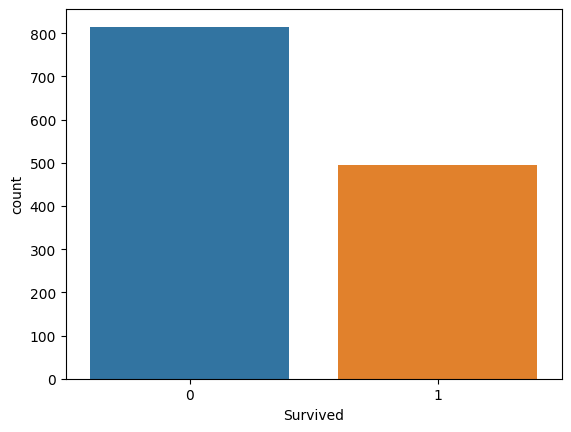

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=data)


## How Many Passengers Were In First Class, Second Class, and Third Class?

In [ ]:
data['Pclass'].value_counts()


3    709
1    323
2    277
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

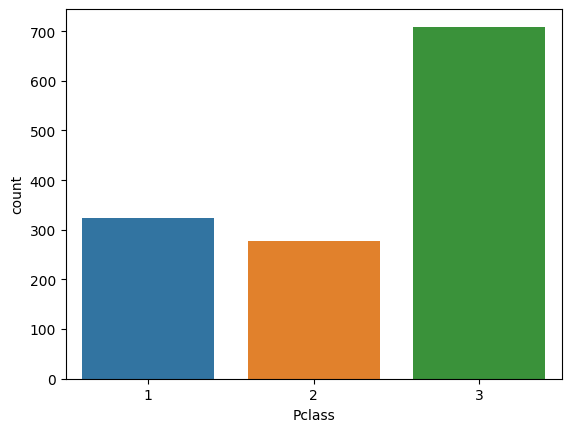

In [ ]:
sns.countplot(x='Pclass', data=data)


## Number of Male And Female Passengers

In [ ]:
data['Sex'].value_counts()


male      843
female    466
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

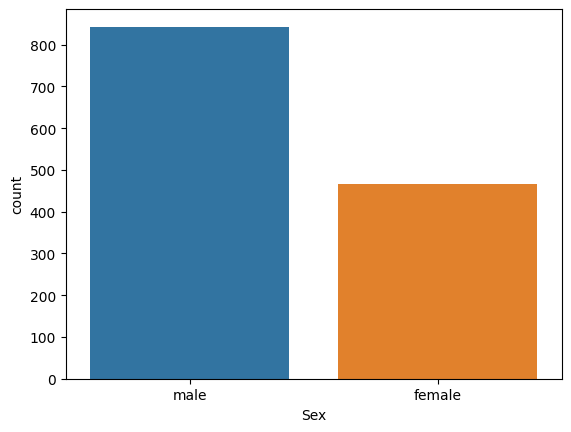

In [ ]:
sns.countplot(x ='Sex', data = data)


(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

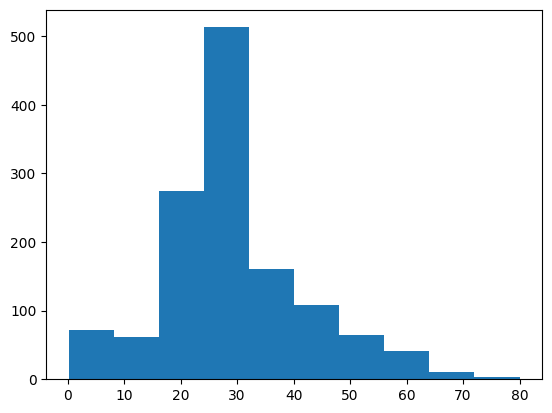

In [ ]:
plt.hist(data['Age'])


#**12. Bivariate Analysis**




## How Has Better Chance of Survival Male or Female?

<Axes: xlabel='Sex', ylabel='Survived'>

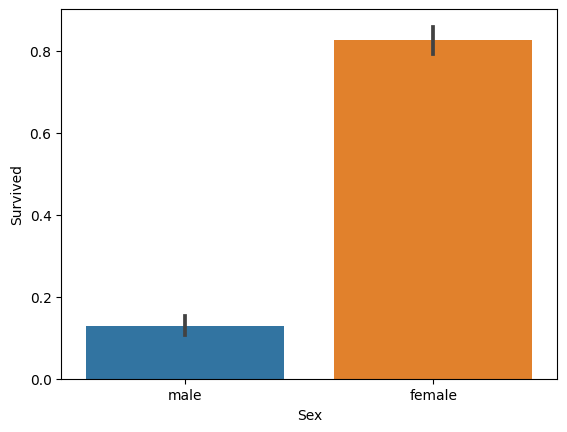

In [ ]:
sns.barplot(x='Sex',y='Survived',data=data)


## Which Passenger Class Has Better Chance of Surviva(First, Second, Or Third Class)?

<Axes: xlabel='Pclass', ylabel='Survived'>

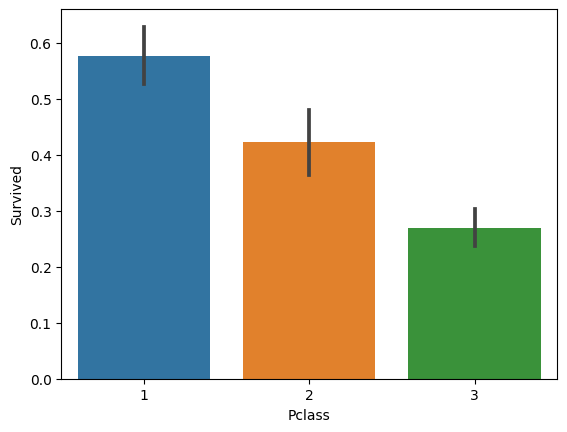

In [ ]:
sns.barplot(x="Pclass", y="Survived",data=data)


In [ ]:

# Convert categorical variables to numeric
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1148,1149,0,3,"Niklasson, Mr. Samuel",28.000000,0,0,363611,8.050,1,0,1,0,0,1
1049,1050,0,1,"Borebank, Mr. John James",42.000000,0,0,110489,26.550,1,0,1,0,0,1
982,983,0,3,"Pedersen, Mr. Olaf",29.881138,0,0,345498,7.775,1,0,1,0,0,1
808,809,0,2,"Meyer, Mr. August",39.000000,0,0,248723,13.000,1,0,1,0,0,1
1195,1196,1,3,"McCarthy, Miss. Catherine Katie""""",29.881138,0,0,383123,7.750,0,1,0,0,1,0


In [ ]:
data=data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


## Dataset Splitting into test and train

In [ ]:
# Split the data into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Data Scaling

In [ ]:
# Scale the numeric features
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# Model 1: Logistic regression using ANN

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Fitting with 100 epochs and 32 batch_size
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
33/33 [==============================] - 1s 2ms/step - loss: 0.6077 - accuracy: 0.7068
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7249
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7287
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7383
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7498
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7574
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7689
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7765
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7813
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7899
Epoch 11/

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Logistics regressionn Accuracy: %.2f' % (accuracy*100))

Logistics regressionn Accuracy: 85.11


# Model 2: 64-32-16-8-1 using ANN



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)


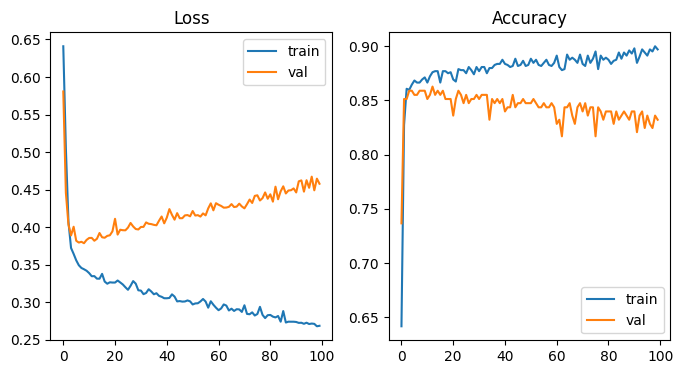

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Model 2 Accuracy: %.2f' % (accuracy*100))

Model 2 Accuracy: 83.21


# *Model 3: (32-16-8-1) ANN*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model_3 = Sequential()
model_3.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model_3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

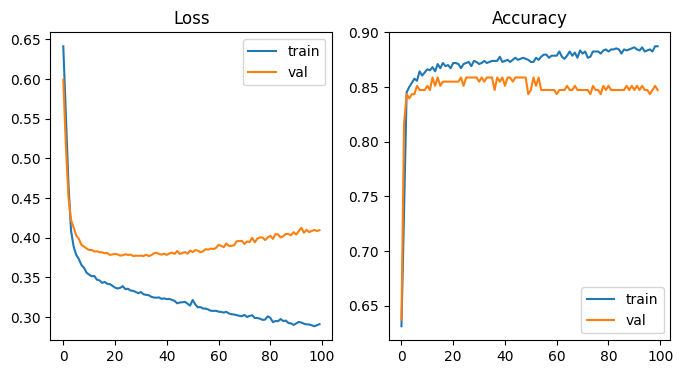

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print('Model 3 Accuracy: %.2f' % (accuracy*100))

Model 3 Accuracy: 84.73


# Model 4:(16-8-1) ANN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model_4 = Sequential()
model_4.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Compile the model
model_4.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model_4.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

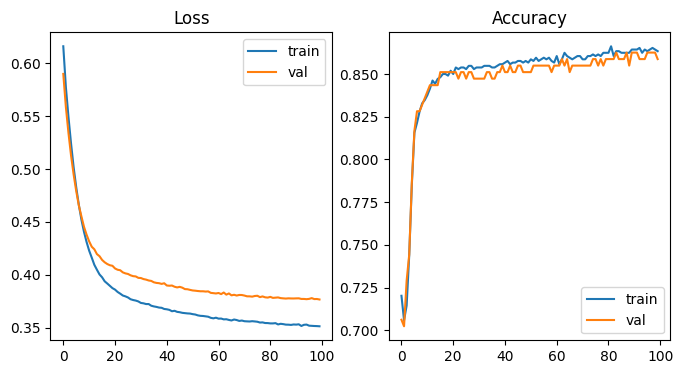

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_4.evaluate(X_test, y_test, verbose=0)
print('Model 4 Accuracy: %.2f' % (accuracy*100))

Model 4 Accuracy: 85.88


# **Model 5: 8-1 ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model_5 = Sequential()
model_5.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

# Compile the model
model_5.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model_5.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

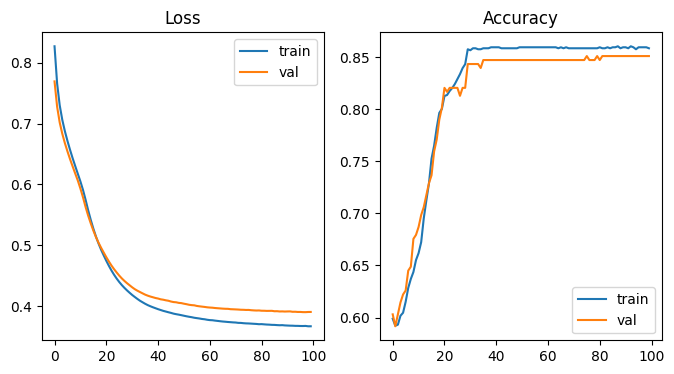

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_5.evaluate(X_test, y_test, verbose=0)
print('Model 5 Accuracy: %.2f' % (accuracy*100))

Model 5 Accuracy: 85.11


# Model 6: (4-1) ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model_6 = Sequential()
model_6.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

# Compile the model
model_6.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model_6.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
33/33 [==============================] - 1s 8ms/step - loss: 0.8714 - accuracy: 0.4021 - val_loss: 0.7234 - val_accuracy: 0.3969
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.4709 - val_loss: 0.6687 - val_accuracy: 0.5229
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.7068 - val_loss: 0.6400 - val_accuracy: 0.7557
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.7966 - val_loss: 0.6196 - val_accuracy: 0.7939
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.8243 - val_loss: 0.6028 - val_accuracy: 0.8130
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.8214 - val_loss: 0.5876 - val_accuracy: 0.8130
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.8223 - val_loss: 0.5735 - val_accuracy: 0.8206
Epoch 8/100
3

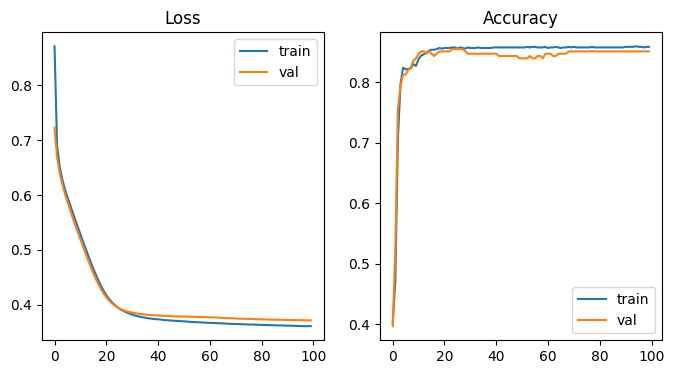

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_6.evaluate(X_test, y_test, verbose=0)
print('Model 6 Accuracy: %.2f' % (accuracy*100))

Model 6 Accuracy: 85.11


# Model 7:2-1 ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a more complex model with more layers and neurons
model_7 = Sequential()
model_7.add(Dense(2, input_dim=X_train.shape[1], activation='relu'))
model_7.add(Dense(1, activation='sigmoid'))

# Compile the model
model_7.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a large number of epochs
history = model_7.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 0.7519 - accuracy: 0.6246 - val_loss: 0.7431 - val_accuracy: 0.6145
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.6246 - val_loss: 0.7206 - val_accuracy: 0.6145
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.6246 - val_loss: 0.7102 - val_accuracy: 0.6145
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.6246 - val_loss: 0.7038 - val_accuracy: 0.6145
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.6246 - val_loss: 0.6984 - val_accuracy: 0.6145
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.6246 - val_loss: 0.6937 - val_accuracy: 0.6145
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6246 - val_loss: 0.6899 - val_accuracy: 0.6145
Epoch 8/100
3

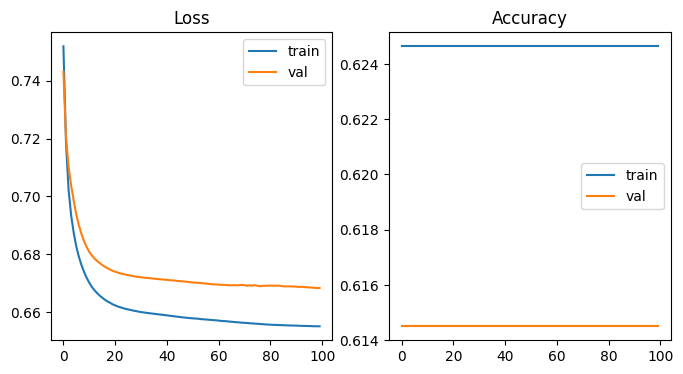

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_7.evaluate(X_test, y_test, verbose=0)
print('Model 7 Accuracy: %.2f' % (accuracy*100))

Model 7 Accuracy: 61.45


# Model 8: Logistic regression using SKLEARN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Create a logistic regression model
model_8 = LogisticRegression()

# Fit the model to the training data
model_8.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model_8.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:%.2f'% (accuracy*100))




Logistic Regression Accuracy:85.11


# Model 9: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
model_9 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# Fit the model to the training data
model_9.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model_9.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Random forest Accuracy:%.2f'% (accuracy*100))


Random forest Accuracy:85.50
